**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 10 - K-mean Clustering

Justin Park, 15 November 2022

## 1. Get and visualize the data to gain insights

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Get the data and apply scaling to the data. Create a scatter plot and guess the number of clusters. Justify your guess.**

In [2]:
data_path = os.path.join("datasets", "brain-bodysize.csv")
data = pd.read_csv(data_path)

In [3]:
scaler = StandardScaler()
scaled = scaler.fit(data)
scaled = pd.DataFrame(data = StandardScaler().fit_transform(data))
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


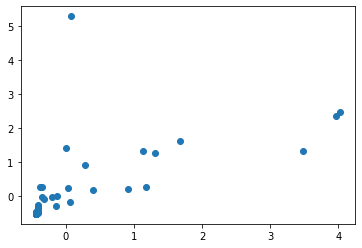

In [4]:
plt.scatter(scaled[0], scaled[1])

I believe this looks like there are 4 clusters. One in the top left, one on the right, one in the bottom left, and one in the middle.

**Train a K-Means clusterer, using the number of clusters from your guess in Step 1.**

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled)

**Create a new scatter plot with a different color for each cluster. Show the centroids.**

In [6]:
kmeans.cluster_centers_

array([[-0.38432378, -0.38813628],
       [ 0.08385039,  5.29974379],
       [ 3.82322112,  2.05629589],
       [ 0.86175346,  0.89523876]])

In [7]:
scaled['cluster'] = kmeans.fit_predict(scaled[[0, 1]])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
scaled['cen_x'] = scaled.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
scaled['cen_y'] = scaled.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3]})

colors = ['b', 'g', 'r', 'y']
scaled['c'] = scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

In [8]:
scaled = scaled.rename(columns={0: "Brain", 1: "Body"})

In [9]:
centers = np.array(kmeans.cluster_centers_)

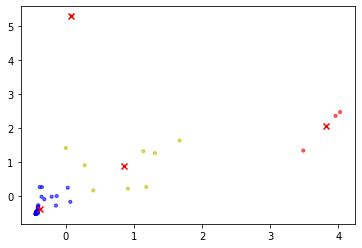

In [10]:
plt.plot()
plt.scatter(scaled.Brain, scaled.Body, c=scaled.c, alpha = 0.6, s=10)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

**Compute the silhouette score.**

In [11]:
print(silhouette_score(scaled[["Brain", "Body"]], kmeans.labels_))

0.7722253718658546


**Create a for loop to find best number of clusters based on the silhouette score.**

In [12]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
score = 0.0
cluster_scores = []
cluster = 0
scaled_new = scaled[["Brain", "Body"]]
for x in clusters:
    kmeans = KMeans(n_clusters=x).fit(scaled_new)
    cluster_scores.append(silhouette_score(scaled_new, kmeans.labels_))
    if (silhouette_score(scaled_new, kmeans.labels_) > score):
        cluster = x
        score = silhouette_score(scaled_new, kmeans.labels_)


In [14]:
print(cluster)
print(score)

2
0.8005470460407278


The number of optimal clusters was 2 with a silhouette score of 0.80.

**Create a plot of the number of clusters VS the sihouette score.**

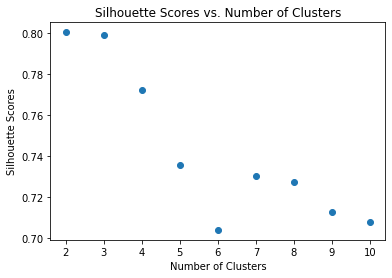

In [15]:
plt.plot()
plt.scatter(clusters, cluster_scores)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Scores')
plt.title("Silhouette Scores vs. Number of Clusters")
plt.show()